# Machine learning in Geosciences -  Ensemble learning

**Department of Applied Geoinformatics and Carthography, Charles University**

15.04.2024

---------------
Mgr. Daniel Bicák    
*bicakd@natur.cuni.cz*

---------------

### Dataset

Firstly, we need to create a dataset, which will be used for testing our algorithms. We will use **scipy** library. You can install it using `conda install -c anaconda scipy`. Our dataset will consist of **200 samples** (instances) and has **4 features**.

In [1]:
# import the libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

In [ ]:
%matplotlib inline

In [2]:
# lets create a function for min max scalling

def custom_scaler(data, min_v, max_v):
    return min_v+(((data-data.min())*(max_v-min_v))/(data.max()-data.min()))

In [3]:
# define dataset size
dataset_size = 200

# generate all features, we will sample it from logistic distribution
from scipy.stats import logistic

feature1 = logistic.rvs(size=dataset_size).reshape(-1,1)
feature2 = logistic.rvs(size=dataset_size).reshape(-1,1)
feature3 = logistic.rvs(size=dataset_size).reshape(-1,1)
feature4 = logistic.rvs(size=dataset_size).reshape(-1,1)


# scale features
feature1 = custom_scaler(feature1, 0,1)
feature2 = custom_scaler(feature2, 0,1)
feature3 = custom_scaler(feature3, 0,1)
feature4 = custom_scaler(feature4, 0,10)


# create relationship
feature1_v = 1.2 * feature1
feature2_v = (-2*(feature2**2)) + (2*feature2)
feature3_v = (3*(feature3**2)) + (feature3)
feature4_v = np.sin(feature4)

# calculate the dependent variable
D = (feature1_v+feature2_v+feature3_v+feature4_v).flatten()
#D = (feature1_v+feature4_v).flatten()

# inject the noise
# noise has max size of 10% of max value of D
max_size = D.max()/10

from scipy.stats import uniform

# we will generate it from uniform distribution and randomly add to D
noise = uniform.rvs(size=dataset_size)

# scale the noise from -max to max
noise_scaled = custom_scaler(noise, -max_size, max_size)

# add to the dependent variable
D_with_noise = D + noise_scaled

# scale back feature4
feature4 = custom_scaler(feature4, 0,1)

Let's explore the dataset.

Text(0.5, 1.0, 'feature 4')

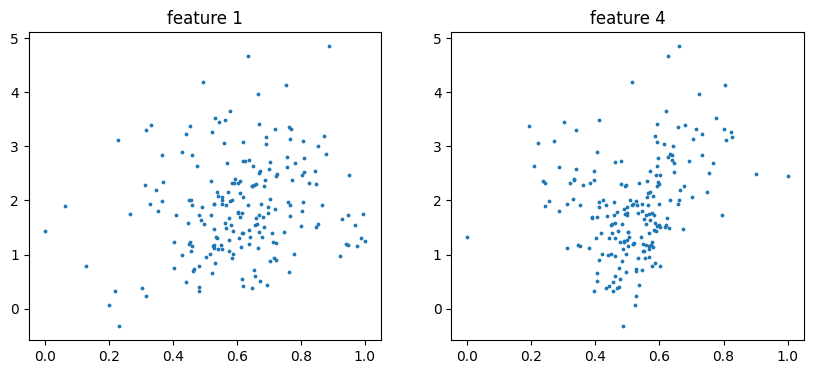

In [4]:
fig1 = plt.figure(figsize=(10,4))

fig1ax1 = fig1.add_subplot(121)
fig1ax2 = fig1.add_subplot(122)

fig1ax1.scatter(feature1, D_with_noise, s=3)
fig1ax1.set_title('feature 1')
fig1ax2.scatter(feature4, D_with_noise, s=3)
fig1ax2.set_title('feature 4')

Text(0.5, 1.0, 'Dependent variable')

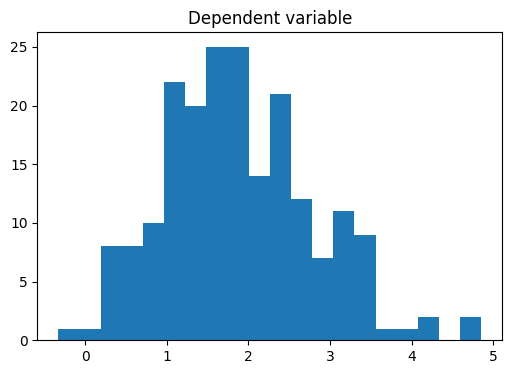

In [6]:
fig2 = plt.figure(figsize=(6,4))

fig2ax1 = fig2.add_subplot(111)
fig2ax1.hist(D_with_noise, bins=20)
fig2ax1.set_title('Dependent variable')

In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

There are no visible patterns in the data. Can our algorithms approximate relationship accurately? Let's find out!

In [5]:
from sklearn.model_selection import train_test_split

# merge all array into one
Dataset = np.hstack((feature1, feature2, feature3, feature4))

# split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(Dataset, D_with_noise, test_size=0.25, random_state=42)

### Random Forest and Decision trees

`scikit learn` contains Random Forest class object. We can work with regressor similarly to other algorithms.

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a Random Forest instance
RF_reg = RandomForestRegressor(max_depth=10, random_state=42, n_estimators=200, max_features=3)
RF_reg.fit(X_train, y_train)

# Create a Decision tree instance
DT_reg = DecisionTreeRegressor(random_state=42)
DT_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error

# make a prediction for each algorithm
RF_pred = RF_reg.predict(X_test)
RF_rmse = mean_squared_error(y_test, RF_pred, squared=False)

DT_pred = DT_reg.predict(X_test)
DT_rmse = mean_squared_error(y_test, DT_pred, squared=False)

print(f'RMSE for Random Forest is: {RF_rmse}, and for Decision Tree is: {DT_rmse}')

RMSE for Random Forest is: 0.5254230120285837, and for Decision Tree is: 0.6691777931671752


c:\Users\uzivatel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\uzivatel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


What is the importance value for each feature?

In [11]:
RF_reg.feature_importances_

array([0.07986409, 0.04845517, 0.44537193, 0.42630881])

We can explore how can Random Forest approximate the relationship. We will generate values for desired feature, other will be set to mean value. Let's investigate the relationship between feature4 and dependent variable.

In [12]:
# generate array from 0 to 1, dummy values for feature we want to explore
size=500

desired_feature = np.linspace(0,1,size)

# other features can have random single value, however best suited is mean value
feat1_mean = np.full(shape=size, fill_value=0, dtype=float)
feat2_mean = np.full(shape=size, fill_value=0, dtype=float)
feat3_mean = np.full(shape=size, fill_value=0, dtype=float)

# merge features
RF_test_set = np.hstack((feat1_mean.reshape(-1,1), feat2_mean.reshape(-1,1), feat3_mean.reshape(-1,1), desired_feature.reshape(-1,1)))

# and predict
RF_output = RF_reg.predict(RF_test_set)

# we can do the same for decision tree
DT_output = DT_reg.predict(RF_test_set)


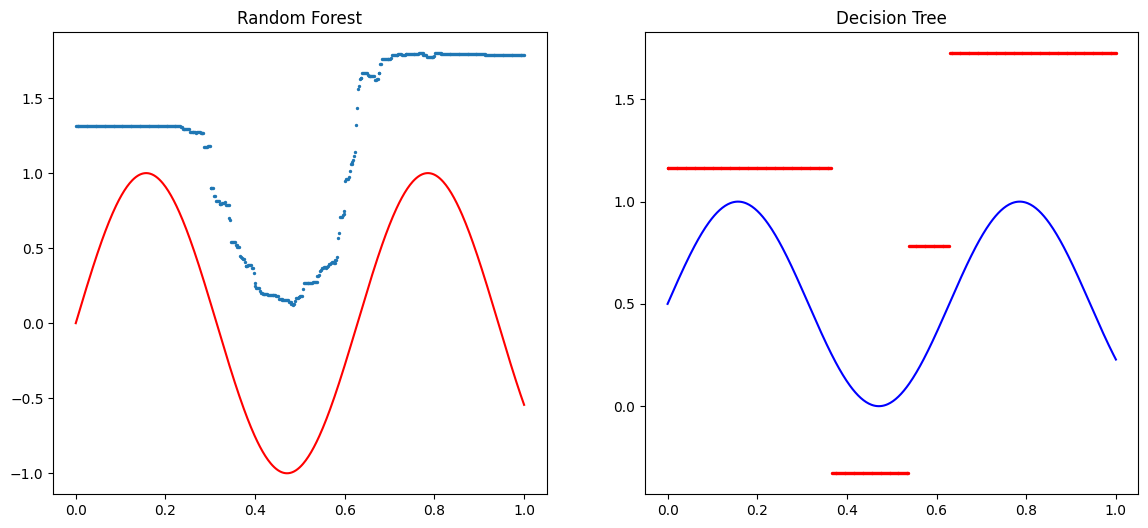

In [13]:
# plot the output

fig3 = plt.figure(figsize=(14,6))

fig3ax1 = fig3.add_subplot(121)
fig3ax1.scatter(desired_feature, RF_output, s=2)
fig3ax1.set_title('Random Forest')
fig3ax1.plot(desired_feature, np.sin(custom_scaler(desired_feature, 0, 10)), c='r' )


fig3ax2 = fig3.add_subplot(122)
fig3ax2.scatter(desired_feature, DT_output, s=2, c='r')
fig3ax2.set_title('Decision Tree')
fig3ax2.plot(desired_feature, (custom_scaler(np.sin(custom_scaler(desired_feature, 0, 10)), 0,1)), c='b' )

### Exercise 1

Can you tune the hyperparameters of these two algorithms? Try to achieve better results! You can use *Out-of-bag* samples when tuning Random Forest.

In [15]:
from sklearn.model_selection import GridSearchCV 

# out of bag samples = parameter oob_... : True
# pak najít oob_score

In [16]:
forest_reg = RandomForestRegressor(random_state=42)

In [20]:
hyperparameter_space = {'n_estimators': [50, 100, 150, 200], # no. of trees the model is computing
                        'max_depth': [10, 15, 20], # the higher the depth, the more you overfit
                        'min_samples_leaf': [2, 4]
                        }

gs = GridSearchCV(forest_reg, param_grid=hyperparameter_space, n_jobs=4,
                  scoring="neg_mean_absolute_error", cv=10, return_train_score=True)


In [21]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20], 'min_samples_leaf': [2, 4],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [22]:
# Optimal parameters and scores 
print("Optimal hyperparameter combination: ", gs.best_params_)

Optimal hyperparameter combination:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}


In [23]:
gs.best_score_

-0.34471140750762963

In [24]:
RF_model = gs.best_estimator_

In [25]:
RF_output_gridsearch = RF_model.predict(RF_test_set)

##### Out of bag sampling

In [26]:
RF_oob = RandomForestRegressor(random_state=42, oob_score=True)

In [27]:
RF_oob.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [30]:
RF_output_OOB = RF_oob.predict(RF_test_set)

In [29]:
# make a prediction for each algorithm
RF_GS_pred = RF_model.predict(X_test)
RF_GS_rmse = mean_squared_error(y_test, RF_pred)

RF_OOB_pred = DT_reg.predict(X_test)
RF_OOB_rmse = mean_squared_error(y_test, DT_pred)

print(f'RMSE for Random Forest with GridSearch is: {RF_GS_rmse}, and with OOB is: {RF_OOB_rmse}')

RMSE for Random Forest with GridSearch is: 0.27606934156918916, and with OOB is: 0.44779891886809076


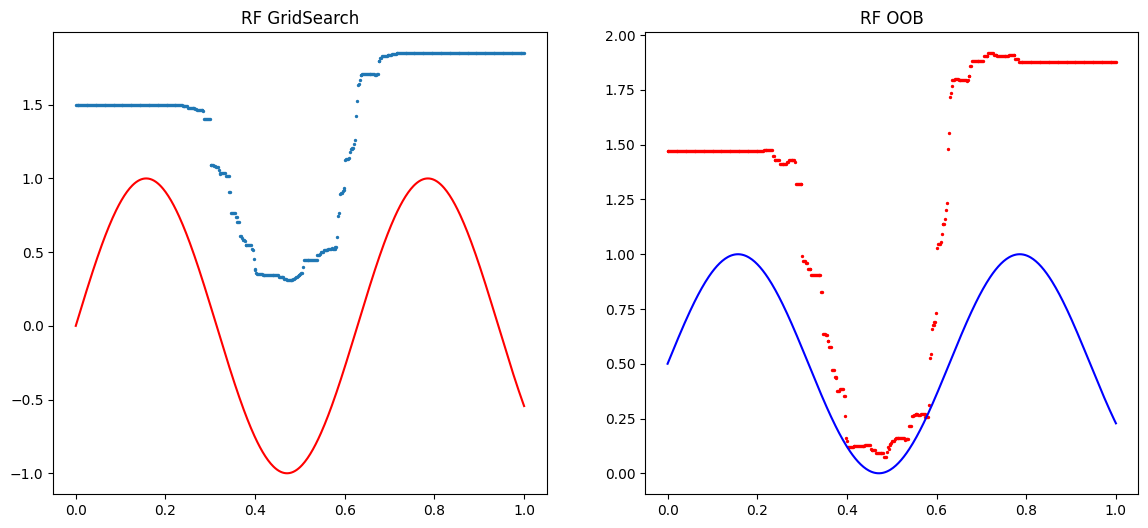

In [31]:
# plot the output

fig3 = plt.figure(figsize=(14,6))

fig3ax1 = fig3.add_subplot(121)
fig3ax1.scatter(desired_feature, RF_output_gridsearch, s=2)
fig3ax1.set_title('RF GridSearch')
fig3ax1.plot(desired_feature, np.sin(custom_scaler(desired_feature, 0, 10)), c='r' )


fig3ax2 = fig3.add_subplot(122)
fig3ax2.scatter(desired_feature, RF_output_OOB, s=2, c='r')
fig3ax2.set_title('RF OOB')
fig3ax2.plot(desired_feature, (custom_scaler(np.sin(custom_scaler(desired_feature, 0, 10)), 0,1)), c='b' )

In [32]:
RF_tuned = RandomForestRegressor(random_state=42)

In [37]:
hyperparameter_space = {'n_estimators': [50, 100, 150, 200], # no. of trees the model is computing
                        'max_depth': [10, 15, 20], # the higher the depth, the more you overfit
                        'min_samples_leaf': [2, 4],
                        'oob_score': [True, False],
                        'max_features': [1,2,3,4]
                        }

gs_RF = GridSearchCV(RF_tuned, param_grid=hyperparameter_space, n_jobs=4,
                  scoring="neg_mean_absolute_error", cv=10, return_train_score=True)


In [38]:
gs_RF.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4],
                         'n_estimators': [50, 100, 150, 200],
                         'oob_score': [True, False]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [39]:
# Optimal parameters and scores 
print("Optimal hyperparameter combination: ", gs_RF.best_params_)

Optimal hyperparameter combination:  {'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 100, 'oob_score': True}


In [ ]:
# vyplotit vliv n_estimators

### Exercise 2

Plot the parameter *number of trees* and RMSE of Random Forest model.

### Adaboost and Gradient Boost

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions, see the seminal work of J.H. Friedman. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

*from scikit learn*

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor

https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

In [40]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

Ada_reg = AdaBoostRegressor(random_state=42, n_estimators=100, learning_rate=1)
Grad_reg = GradientBoostingRegressor(random_state=42, learning_rate=0.1)

Ada_reg.fit(X_train, y_train)
Grad_reg.fit(X_train, y_train)

Ada_pred = Ada_reg.predict(X_test)
Grad_pred = Grad_reg.predict(X_test)

In [41]:
Ada_rmse = mean_squared_error(y_test, Ada_pred, squared=False)
Grad_rmse = mean_squared_error(y_test, Grad_pred, squared=False)

print(f'RMSE for AdaBoost is: {Ada_rmse}, and for Gradient Boosting is: {Grad_rmse}')

RMSE for AdaBoost is: 0.4844069098929256, and for Gradient Boosting is: 0.4671785722449813


c:\Users\uzivatel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\uzivatel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Exercise 3

Find out, what is the best learning rate for Gradient Boosting.

In [48]:
Grad_reg_LR = GradientBoostingRegressor(random_state=42)

hyperparameter_space = {'learning_rate': range(0,10,1)
                        }

gs_RF = GridSearchCV(Grad_reg_LR, param_grid=hyperparameter_space, n_jobs=4,
                  scoring="neg_mean_absolute_error", cv=10, return_train_score=True)


In [49]:
Grad_reg_LR.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [52]:
Grad_reg_LR.learning_rate

0.1

In [61]:
#learning_rate = np.linspace(0,1,11)
learning_rate = np.arange(0,1,0.1)
rmse = []

for rate in learning_rate:
    Grad_reg = GradientBoostingRegressor(random_state=42, learning_rate=rate)

    Grad_reg.fit(X_train, y_train)

    Grad_pred = Grad_reg.predict(X_test)

    Grad_rmse = mean_squared_error(y_test, Grad_pred)
    rmse.append(Grad_rmse)


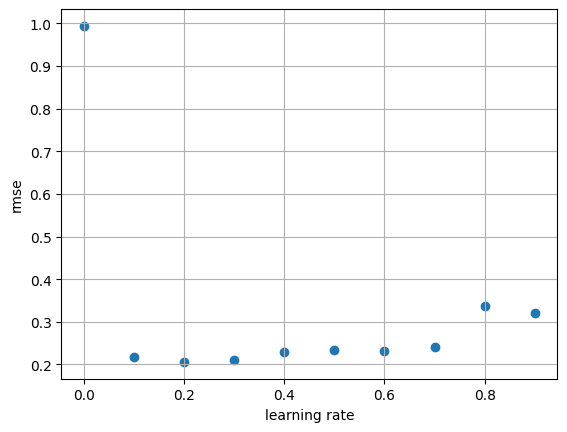

In [62]:
plt.scatter(learning_rate,rmse)
plt.xlabel("learning rate")
plt.ylabel("rmse")
plt.grid(True)

In [63]:
print(learning_rate)
print(rmse)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.993820457389601, 0.21825581836485924, 0.2059250920455719, 0.2104621692142195, 0.22902613387639026, 0.23496182380145123, 0.23248011826380197, 0.23975636144765225, 0.33772803218286723, 0.31984499139403016]


### Exercise 4

Read the documentation and apply the *early stopping* option on Gradient Boosting algorithm.


## Bagging -  Exercise 5

Bagging is a general concept. This example will focus on applying bagging to the K-Nearest Neigbour algorithm. KNN is relatively weak algorithm, we want to know, whether bagging can improve the performace. Can KNN match the power of Random Forest or Gradient Boost? We will use the same dataset. Find the information about bagging here; https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# create an instance of regressor
KNN_reg = KNeighborsRegressor(n_neighbors=5)

# find the best possible parameters using gridsearch

# create an instance of bagging

# fit the data
.fit(X_train, y_train)

# predict new values
.predict(X_test)

# calculate RMSE


In [ ]:
# you can improve the accuracy further by changing the parameters of bagging
# parameter "max_features" will induce diversity into the model



## Stacking - Exercise 6

Stack of estimators with a final regressor.

Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

*- scikit learn*

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor

Aggregate all predictor and create a new model. Hypothethically, new model should achieve best results. It is up to you, which and how many of sub-model you include in meta-learner.

## Boosting - Exercise 7

Can you apply boosting principle to a different algorithm than decision stump?

Hint: Use weight parameter within the .fit method.



In [ ]:
# boosting si musíme naprogramovat sami

### APPENDIX 1 - Overfitting, Max depth

In [ ]:
featurex = logistic.rvs(size=1000).reshape(-1,1)
featurex = custom_scaler(featurex, 0,25)
D = custom_scaler(np.cos(featurex),0,1)
featurex = custom_scaler(featurex, 0,1)

noise = uniform.rvs(size=1000)
noise_scaled = custom_scaler(noise, -1, 1)/2
D = noise_scaled.reshape(-1,1) + D.reshape(-1,1)

In [ ]:
X_trainx, X_testx, y_trainx, y_testx = train_test_split(featurex.reshape(-1,1), D, test_size=0.25, random_state=42)

RFx_reg1 = RandomForestRegressor(max_depth=1, random_state=42, n_estimators=100)
RFx_reg1.fit(X_trainx, y_trainx)

RFx_reg2 = RandomForestRegressor(max_depth=2, random_state=42, n_estimators=100)
RFx_reg2.fit(X_trainx, y_trainx)

RFx_reg5 = RandomForestRegressor(max_depth=5, random_state=42, n_estimators=100)
RFx_reg5.fit(X_trainx, y_trainx)

RFx_reg10 = RandomForestRegressor(max_depth=10, random_state=42, n_estimators=100)
RFx_reg10.fit(X_trainx, y_trainx)


<ipython-input-355-9df04049f577>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFx_reg1.fit(X_trainx, y_trainx)
<ipython-input-355-9df04049f577>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFx_reg2.fit(X_trainx, y_trainx)
<ipython-input-355-9df04049f577>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFx_reg5.fit(X_trainx, y_trainx)
<ipython-input-355-9df04049f577>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFx_reg10.fit(X_trainx, y_trainx)


RandomForestRegressor(max_depth=10, random_state=42)

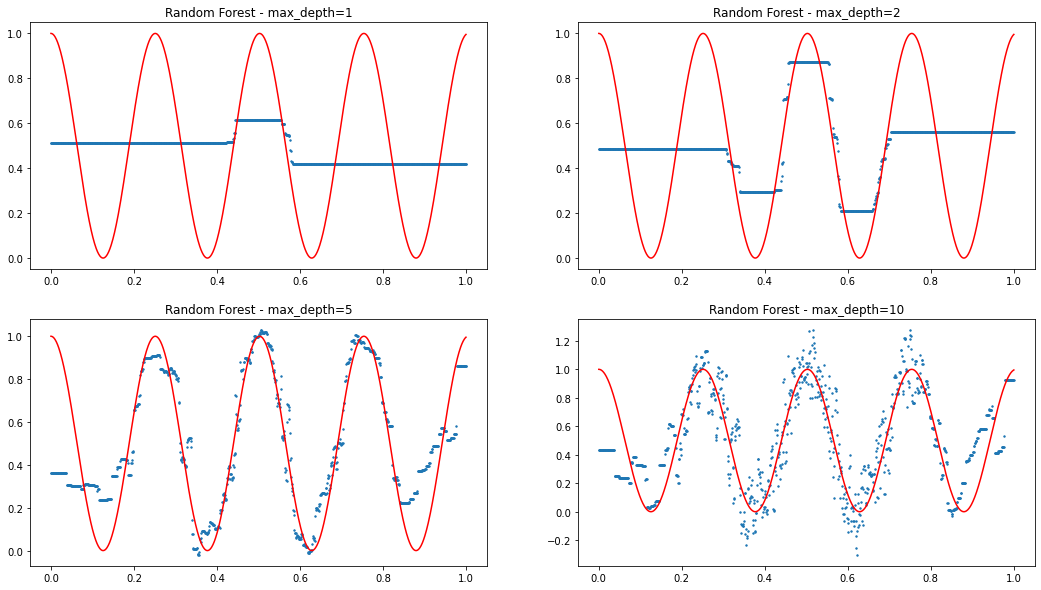

In [ ]:
# plot the output

desired_featurex = np.linspace(0,1,1000)
predx_des1 = RFx_reg1.predict(desired_featurex.reshape(-1, 1))
predx_des2 = RFx_reg2.predict(desired_featurex.reshape(-1, 1))
predx_des5 = RFx_reg5.predict(desired_featurex.reshape(-1, 1))
predx_des10 = RFx_reg10.predict(desired_featurex.reshape(-1, 1))

fig4 = plt.figure(figsize=(18,10))

fig4ax1 = fig4.add_subplot(221)
fig4ax1.scatter(desired_featurex, predx_des1, s=2)
fig4ax1.set_title('Random Forest - max_depth=1')
fig4ax1.plot(desired_featurex, custom_scaler(np.cos(custom_scaler(desired_featurex, 0, 25)), 0,1), c='r' )

fig4ax1 = fig4.add_subplot(222)
fig4ax1.scatter(desired_featurex, predx_des2, s=2)
fig4ax1.set_title('Random Forest - max_depth=2')
fig4ax1.plot(desired_featurex, custom_scaler(np.cos(custom_scaler(desired_featurex, 0, 25)), 0,1), c='r' )

fig4ax1 = fig4.add_subplot(223)
fig4ax1.scatter(desired_featurex, predx_des5, s=2)
fig4ax1.set_title('Random Forest - max_depth=5')
fig4ax1.plot(desired_featurex, custom_scaler(np.cos(custom_scaler(desired_featurex, 0, 25)), 0,1), c='r' )

fig4ax1 = fig4.add_subplot(224)
fig4ax1.scatter(desired_featurex, predx_des10, s=2)
fig4ax1.set_title('Random Forest - max_depth=10')
fig4ax1.plot(desired_featurex, custom_scaler(np.cos(custom_scaler(desired_featurex, 0, 25)), 0,1), c='r' )